## I. Introduction 
This dataset contains information on loans. Collecting data on loans can be valuable for the loan provider as it can help them better determine risk based on information about a client and the loan variables. 

We will use this data to explore what type of loans there are and create a model that will predict whether the loan will be payed back or not.  

1. Use EDA to collect info on how loans are built. 
2. Create model to predict loan risk.
3. Provide recommendations to the loan provider. 

In [1]:
# data wrangling

import pandas as pd
import numpy as np

# data visualization

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## II. Dataset 

#### Loading The Dataset

In [2]:
# reading in the data file
df = pd.read_csv('loan_data.csv')

# taking a look at the data
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Variables
credit.policy: if the customer meets the credit requirments of the loan provider.

purpose: reason for loan.

int.rate: interest rate of the loan.

installment: monthly bill for the customer per their loan. 

log.annual.inc: natural log of the income of the borrower.

dti: debt to income ratio.

fico: FICO credit score of borrower

day.with.cr.line: age of the loan. 

revol.bal: balance of loan that is unpaid.

revol.util: amount of credit used relative to credit available.

inq.list.6mths: creditor inquieries in the last 6 months. 

pub.rec: borrowers number of derogatory public records. 

not.fully.paid: not full paid. 

#### Column Data Types

In [4]:
# Data types of columns

df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Something apparent in the dataset ist that the credit.policy and not.full.paid clumns contain binary data points. However, the data types for these columns are int64. This is something to consider during the data cleaning process. 

## III. Cleaning The Data 

#### Changing Column Names 

In [5]:
# 
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

#### Checking For Missing Data

In [6]:
# Percent of missing data

round(df.isnull().mean()*100, 2)

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

This dataset contains no missing data. 

#### Making The Data More Readable 

In [7]:
# making the interest rate into a percentage

df['int_rate'] = df['int_rate'] *100

In [8]:
# logged annual income as a regular income number

df['log_annual_inc'] = np.exp(df['log_annual_inc'])

# renaming modified column

df.rename(columns = {'log_annual_inc': 'annual_inc'}, inplace = True)

In [9]:
# checking distinct values of credit.policy

df['credit_policy'].value_counts()

1    7710
0    1868
Name: credit_policy, dtype: int64

In [10]:
# checking distinct values of not.fully.paid 

df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

Here we can see that credit_policy and not_fully_paid are indeed binary columns. So we can change the data type of these columns to booleans.

In [11]:
# changing data type of columns 

df['annual_inc'] = df['annual_inc'].astype('int64')
df['credit_policy'] = df['credit_policy'].astype('bool')
df['not_fully_paid'] = df['not_fully_paid'].astype('bool')

In [12]:
# checking for consistent format in purpose column 

df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## IV. Data Exploration

In [13]:
# Credit Policy

df['credit_policy'].value_counts(normalize = True).mul(100).round(2).astype(str)+'%'

True     80.5%
False    19.5%
Name: credit_policy, dtype: object

Taking a closer look at the credit policy column, we can see that almost 20% of the customers do not meet the underwriting credit criteria. 

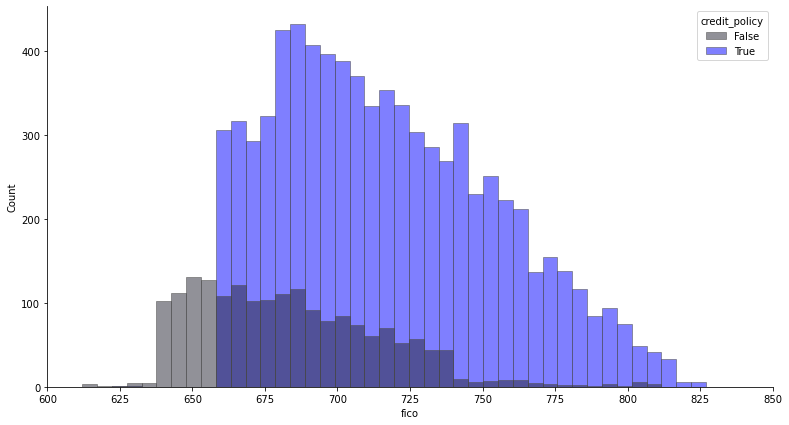

In [14]:
# Histogram of Credit Poolicy and FICO scores

f, ax = plt.subplots(figsize=(13, 7))
sns.despine(f)

sns.histplot(
    df,
    x="fico", hue="credit_policy",
    palette="dark:blue",
    edgecolor=".3",
    linewidth=.5,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([600,625, 650,675, 700,725, 750,775, 800,825, 850])
plt.show()

It seems like this loan company does not provide a customer with a loan unless they have a FICO score of around atleast 660. 

In [15]:
df['not_fully_paid'].value_counts(normalize = True).mul(100).round(2).astype(str)+'%'

False    83.99%
True     16.01%
Name: not_fully_paid, dtype: object

Approximately 84% of the loans have not been fully paid off in this dataset. 

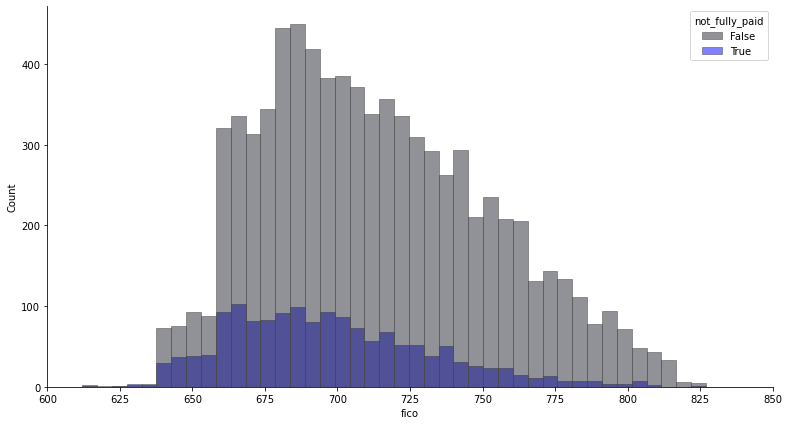

In [16]:
# Histogram of Credit Policy and FICO scores

f, ax = plt.subplots(figsize=(13, 7))
sns.despine(f)

sns.histplot(
    df,
    x="fico", hue="not_fully_paid",
    palette="dark:blue",
    edgecolor=".3",
    linewidth=.5,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([600,625, 650,675, 700,725, 750,775, 800,825, 850])
plt.show()

Naturally, these stats lead us to question if certain types of loans are more likely to be paid back or not. 

#### Loan Purposes

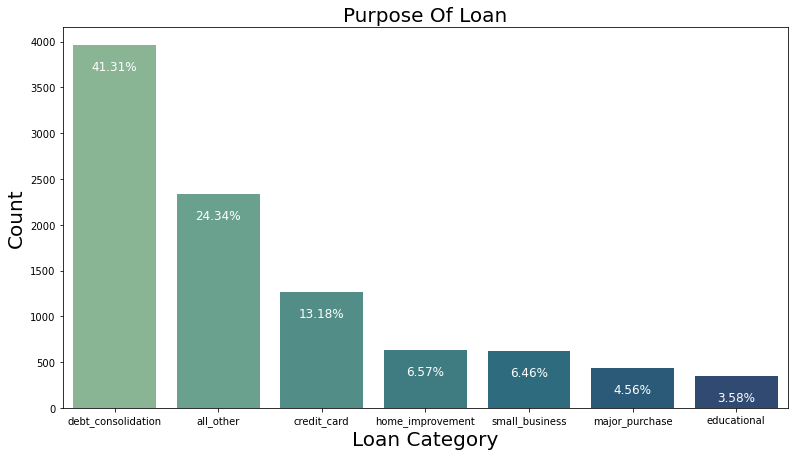

In [17]:
# loan purpose counts 

plt.figure(figsize=(13, 7))
p = sns.countplot(x='purpose', data = df, palette="crest", order=df.purpose.value_counts().index)
for container in p.patches:
    p.annotate(f'\n{round(container.get_height()/len(df)*100, 2).astype(str)}'+'%', (container.get_x()+0.4, container.get_height()), ha='center', va='top', color='white', size=12)
p.set_xlabel('Loan Category', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)
p.set_title('Purpose Of Loan', fontsize = 20)
plt.show()


Here, we can see that the loan purposes pertain to one of the above seven categories. The category with the largest number of loans is 'debt consolidation'. The categroy with the least amount of loans is 'educational'.

In [18]:
df.groupby('purpose').not_fully_paid.value_counts()

purpose             not_fully_paid
all_other           False             1944
                    True               387
credit_card         False             1116
                    True               146
debt_consolidation  False             3354
                    True               603
educational         False              274
                    True                69
home_improvement    False              522
                    True               107
major_purchase      False              388
                    True                49
small_business      False              447
                    True               172
Name: not_fully_paid, dtype: int64

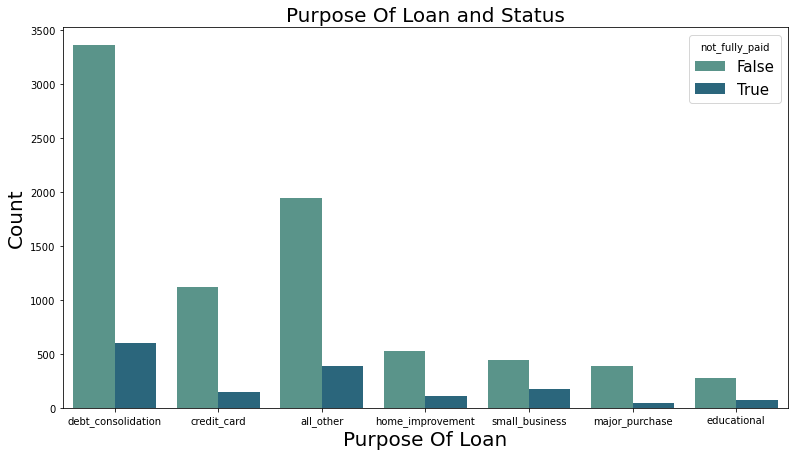

In [19]:
# Loan Fully Paid Or Not By Purpose

plt.figure(figsize=(13, 7))
p = sns.countplot(data=df,palette="crest", x='purpose', hue='not_fully_paid')
p.legend(title='not_fully_paid', loc='upper right', fontsize = 15)
p.set_xlabel('Purpose Of Loan', fontsize = 20)
p.set_ylabel('Count', fontsize = 20)
p.set_title('Purpose Of Loan and Status', fontsize = 20)
plt.show()

In [20]:
# Loan type 

round(df.groupby('purpose').not_fully_paid.mean()*(100),2).astype(str)+'%'

purpose
all_other              16.6%
credit_card           11.57%
debt_consolidation    15.24%
educational           20.12%
home_improvement      17.01%
major_purchase        11.21%
small_business        27.79%
Name: not_fully_paid, dtype: object

Small business type loans are most commonly not paid back.


In [21]:
# Revolving balances for loan types that are not fully paid back

round(df.groupby(['purpose', 'not_fully_paid']).revol_bal.mean(),2)

purpose             not_fully_paid
all_other           False             11935.46
                    True              17642.96
credit_card         False             22687.84
                    True              26942.16
debt_consolidation  False             16798.80
                    True              19081.88
educational         False             10271.83
                    True              13041.03
home_improvement    False             17383.53
                    True              17061.52
major_purchase      False              7207.66
                    True               7865.73
small_business      False             22721.98
                    True              40209.52
Name: revol_bal, dtype: float64

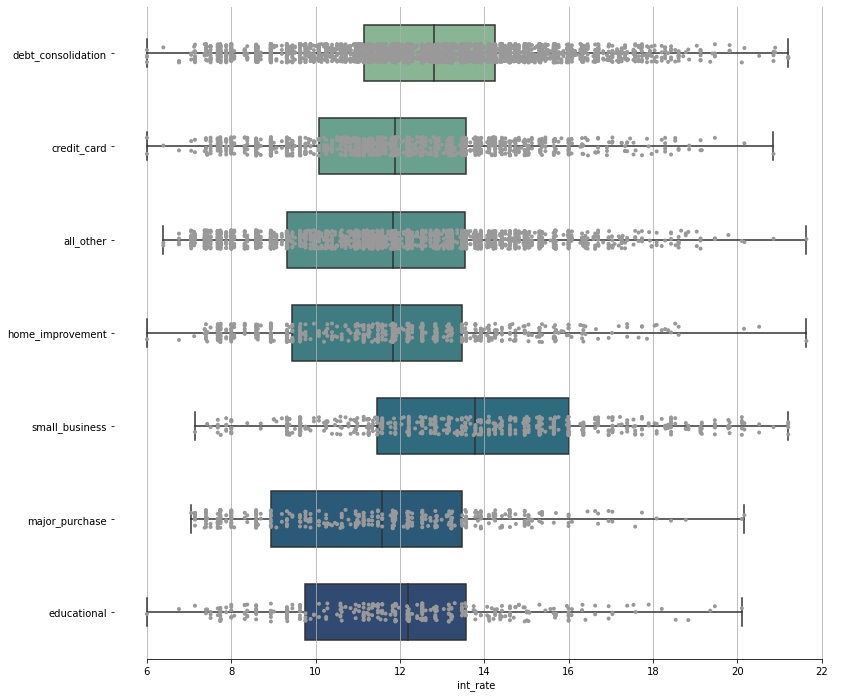

In [22]:
# Boxplot of interest rates for the different loan purposes. 

f, ax = plt.subplots(figsize=(13, 12))

# boxplot
sns.boxplot(x="int_rate", y="purpose", data=df,
            whis=[0, 100], width=.6, palette="crest")

# observation points
sns.stripplot(x="int_rate", y="purpose", data=df,
              size=4, color=".6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [23]:
# rounded mean interest rate by loan purpose

round(df.groupby('purpose').int_rate.mean(),2).astype(str)+'%'

purpose
all_other             11.68%
credit_card           11.97%
debt_consolidation    12.66%
educational           11.99%
home_improvement      11.75%
major_purchase        11.42%
small_business        13.81%
Name: int_rate, dtype: object

From the graph and means, we can see that small business loans have the highest interest rate on average. This is probably due to there being a higher risk associated with this type of loan. 

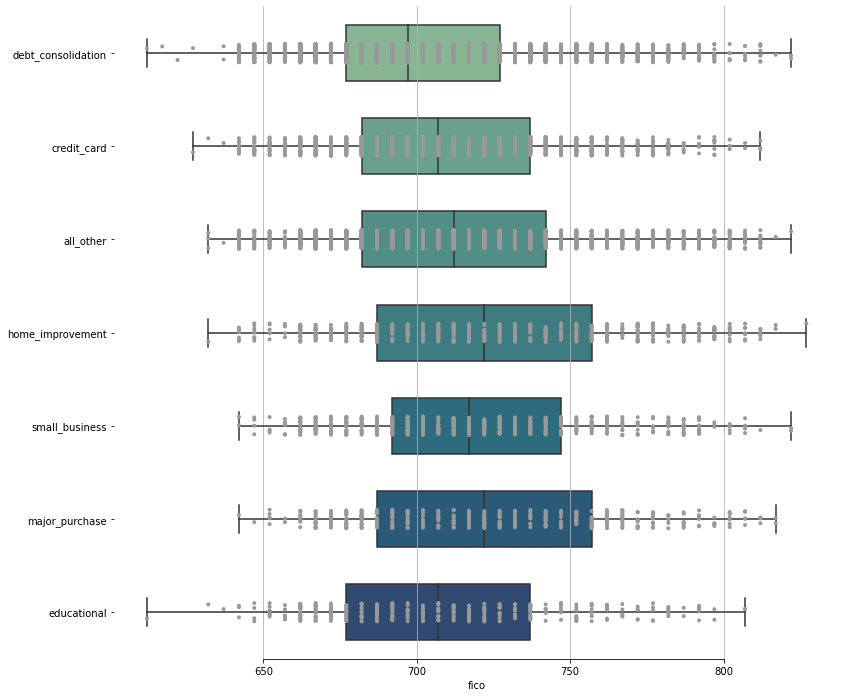

In [24]:
# Boxplot of FICO scores for the different loan purposes. 

f, ax = plt.subplots(figsize=(13, 12))

# boxplot
sns.boxplot(x="fico", y="purpose", data=df,
            whis=[0, 100], width=.6, palette="crest")

# observation points
sns.stripplot(x="fico", y="purpose", data=df,
              size=4, color=".6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [25]:
# rounded mean interest rate by loan purpose

round(df.groupby('purpose').fico.mean(),0).astype(str)

purpose
all_other             715.0
credit_card           710.0
debt_consolidation    704.0
educational           708.0
home_improvement      725.0
major_purchase        723.0
small_business        720.0
Name: fico, dtype: object

These boxplots show us that the average fico scores for people who take out loans for major purchases and home improvement are higher than scores of people who take out other types of loans. Also, we can see that people with debt consolidation type loans have the lowest FICO scores.

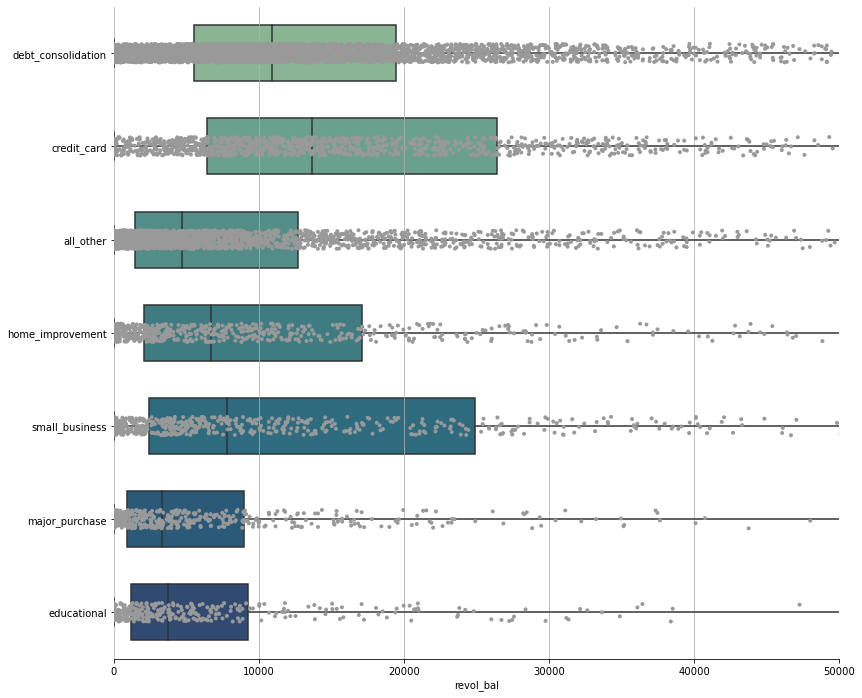

In [26]:
# Boxplot of revolving balance for the different loan purposes. 

f, ax = plt.subplots(figsize=(13, 12))

# boxplot
sns.boxplot(x="revol_bal", y="purpose", data=df,
            whis=[0, 100], width=.6, palette="crest")


# observation points
sns.stripplot(x='revol_bal', y="purpose", data=df,
              size=4, color=".6", linewidth=0)

# Tweak the visual presentation
ax.set(xlim=(0,50000))
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [27]:
# average revolving balances by loan purpose

df.groupby('purpose').revol_bal.mean()

purpose
all_other             12883.039897
credit_card           23180.020602
debt_consolidation    17146.710639
educational           10828.897959
home_improvement      17328.756757
major_purchase         7281.453089
small_business        27581.203554
Name: revol_bal, dtype: float64

Small business loans have the highest revolving balances on average which makes sense given that they also have the highest installments. 

### Distribution of Data

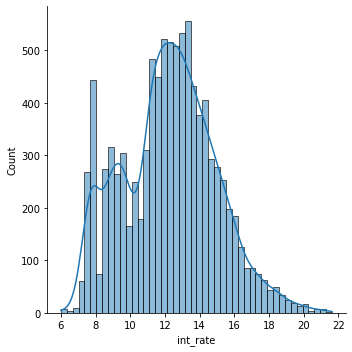

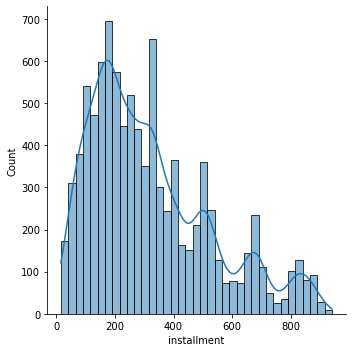

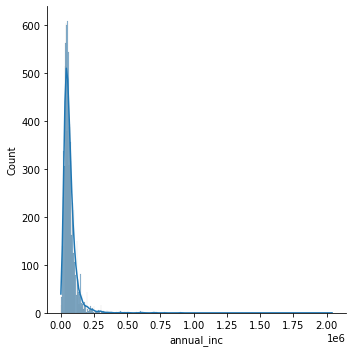

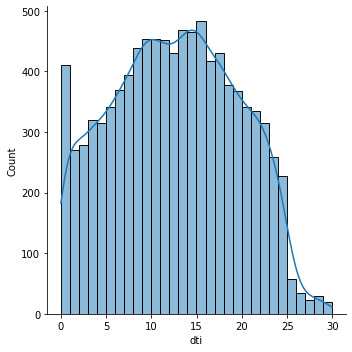

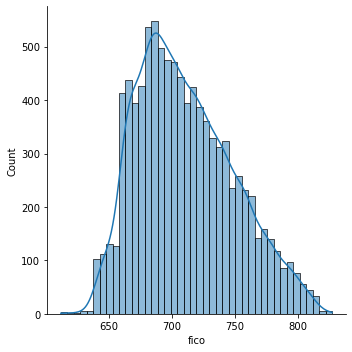

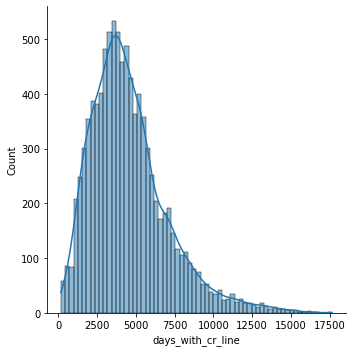

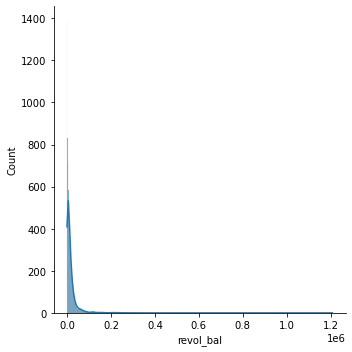

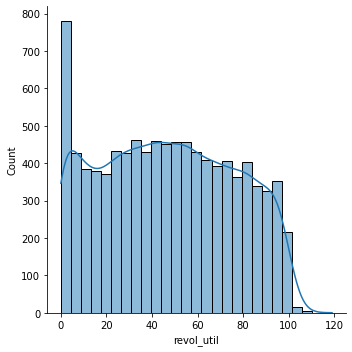

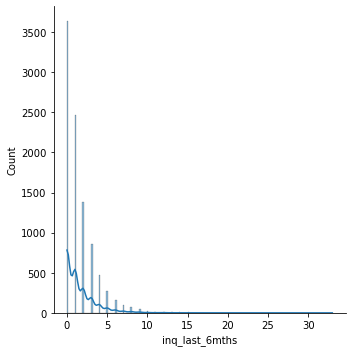

In [28]:
# Distribution plots

for column in df.columns:
    if column not in ('credit_policy', 'purpose', 'not_fully_paid','delinq_2yrs','pub_rec'):
        sns.displot(df[column], kde = True)
        plt.show()

From the distribution plots, we can see that the different data variables are not normally distributed. There are outliers and signs of non normality. Therefore in future analysis, we may need to look at non parametric forms of analyses. 

### Correlation

In [29]:
# pearson correlation between variables

df.corr(method='spearman')

,credit_policy,int_rate,installment,annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.287878,0.073698,0.029399,-0.080286,0.352399,0.112885,-0.009222,-0.102636,-0.433860,-0.057772,-0.048692,-0.158119
int_rate,-0.287878,1.000000,0.242914,0.041647,0.216114,-0.744986,-0.133584,0.148719,0.472965,0.174137,0.172677,0.093887,0.152725
installment,0.073698,0.242914,1.000000,0.431408,0.062547,0.085257,0.201920,0.351844,0.096013,-0.006740,-0.007541,-0.027854,0.040404
annual_inc,0.029399,0.041647,0.431408,1.000000,-0.059671,0.107879,0.400252,0.415819,0.053173,0.030576,0.029731,0.013282,-0.035535
dti,-0.080286,0.216114,0.062547,-0.059671,1.000000,-0.214496,0.072858,0.375950,0.333655,0.028044,-0.018420,0.009311,0.035899
fico,0.352399,-0.744986,0.085257,0.107879,-0.214496,1.000000,0.251729,-0.094562,-0.520085,-0.173743,-0.237059,-0.148294,-0.147920
days_with_cr_line,0.112885,-0.133584,0.201920,0.400252,0.072858,0.251729,1.000000,0.323954,-0.004041,-0.042324,0.094645,0.101549,-0.025379
revol_bal,-0.009222,0.148719,0.351844,0.415819,0.375950,-0.094562,0.323954,1.000000,0.514898,-0.023088,-0.053657,-0.025633,0.020440
revol_util,-0.102636,0.472965,0.096013,0.053173,0.333655,-0.520085,-0.004041,0.514898,1.000000,-0.016175,-0.032189,0.071434,0.081448
inq_last_6mths,-0.433860,0.174137,-0.006740,0.030576,0.028044,-0.173743,-0.042324,-0.023088,-0.016175,1.000000,0.021115,0.055862,0.131478


To calculate the correlatiion between the different loan avraibales, we will use the spearman correlation. This is becasue our data shows signs of non linearity and has outliers, assumptions needed to use the more standard pearson correlation. 

#### Heat Map

In [30]:
# converting 'purpose' column from an object to a category type, to include in heat map

for_heat = df
for_heat['purpose'] = for_heat['purpose'].astype('category')
for_heat['purpose'] = for_heat['purpose'].cat.codes
#for_heat.head()

In order to include purpose in our correlation heat map, we must categorize the loan purposes in a numeric way. 

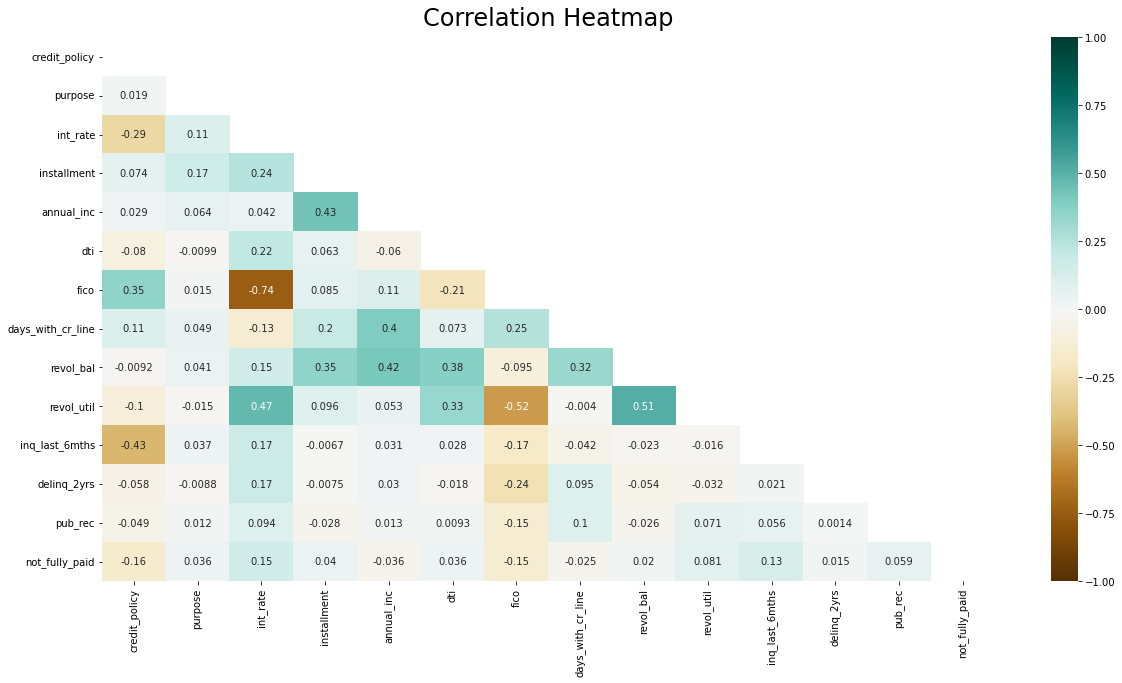

In [31]:
# heat map visualization

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(for_heat.corr(), dtype=bool))
loan_map = sns.heatmap(for_heat.corr(method='spearman'), mask=mask, vmin = -1, vmax=1, annot = True, cmap='BrBG')
loan_map.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);

According to the heat map, we can see that the strongest realtionship between two variables are that of the FICO and interest rate. This is a fairly strong negative correlation, meaning that as the fico score decreases, the interest rate will increase. We also see that the fico score is negatively correlated with the revolving line utilization rate. As the utilization rate increases, the fico rate decreases.

#### Closer look at FICO and Interest Rate

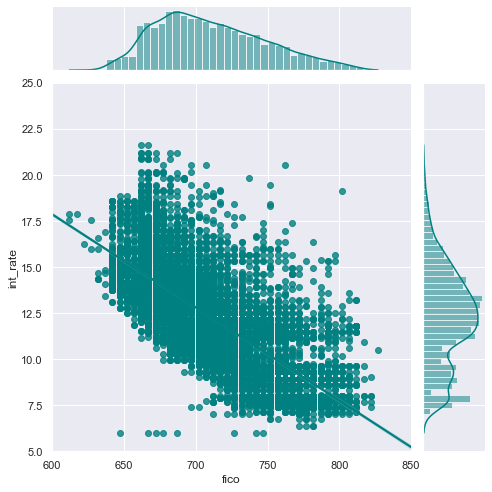

In [32]:
# linear model

sns.set_theme(style="darkgrid")

sns.jointplot(x = 'fico', y = 'int_rate', data=df,
                  kind="reg",truncate=False,
                  xlim=(600, 850), ylim=(5, 25),
                  color="teal", height=7)